In [1]:
# Your name
#Todsavad Tangtortan
# Your student
#st123012

# Final Exam - August 2022

## Instruction

1. Write your name in the top cell with your student ID.
2. Rename the file to *st12xxxx-final.ipynb* where st12xxxx is your student ID.
3. The exam is open book and open internet. You may access any information from anywhere.
4. However, communication with any human being except the proctors is disallowed in this exam. Failure to do so will cause you to get 0.
5. The exam consists of two parts. Programming and multiple choices. This file only consists of the programming part. Use your time wisely.
6. The programming part consists of two questions. 
7. Good luck!!!

## Question 1 (Basic knowledge) (15)

You have learned that the neural network is nothing but multiple equations, if using a linear layer, then multiple linear equations. We have shown you that you can even implement linear regression using one layer of linear.

Now. Your task is to implement a logistic regression using `torch` library and we will classify the infamous `iris` dataset.

Below is the function to load iris dataset and categorized them into only two groups.

In [2]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

def load_dataset():
    X, y = load_iris(return_X_y=True)
    X = X[y!=2]
    y = y[y!=2]
    return X,y

X,y = load_dataset()
print(X.shape, y.shape)

(100, 4) (100,)


Plot the two groups using only features 0 and 1 to show you how easy this task is.

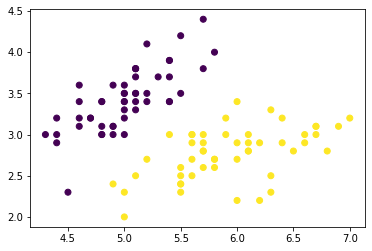

In [3]:
plt.scatter(X[:,0], X[:,1], c=y)

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from __future__ import print_function, division
import os
import pandas as pd
import numpy as np
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

### Q1.1 (4)

Develop a class named `LogisticRegressTorch` which takes `n_features` as an input during creation time.

In [5]:
# Your code
class LogisticRegressTorch(torch.nn.Module):
    def __init__(self,n_features=4,h1=8,h2=9):
        super(LogisticRegressTorch,self).__init__()
        self.layer1 = nn.Linear(n_features,h1)
        self.layer2 = nn.Linear(h1,h2)
        self.layer3 = nn.Linear(h2,1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self,x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.relu(x)
        x = self.layer3(x)
        return self.sigmoid(x)

### Q1.2 (2)

Develop the Dataset class inherit from `torch.utils.data.Dataset`.

This class should name `IrisTorch`.

In [6]:
# Your code
class IrisTorch(Dataset):
    def __init__(self,transform=None):
        self.X, self.y = load_dataset()
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        self.X = pd.DataFrame(self.X)
        self.y = pd.DataFrame(self.y)
        preds = self.X.iloc[idx, :]
        spc = self.y.iloc[idx]
        preds = np.array([preds])
        preds = preds.astype('float').reshape(-1, 4)
        spc = np.array([spc])
        spc = spc.astype('float').reshape(-1, 1)
        sample = {'preds': preds, 'spc': spc}

        if self.transform:
            sample = self.transform(sample)
            
        return sample

In [7]:
class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        pred, spc = sample['preds'], sample['spc']

        # return {'preds': torch.from_numpy(pred),
        #         'spc': torch.from_numpy(spc)}
        return torch.from_numpy(pred).to(torch.float32), torch.from_numpy(spc).to(torch.float32)

In [8]:
iris_dataset = IrisTorch(transform=transforms.Compose([ToTensor()]))
for i in range(len(iris_dataset)):
    sample = iris_dataset[i]
    # print(i, sample['preds'], sample['spc'])
    print(i,sample[0],sample[-1])
    if i == 3:
        break

0 tensor([[5.1000, 3.5000, 1.4000, 0.2000]]) tensor([[0.]])
1 tensor([[4.9000, 3.0000, 1.4000, 0.2000]]) tensor([[0.]])
2 tensor([[4.7000, 3.2000, 1.3000, 0.2000]]) tensor([[0.]])
3 tensor([[4.6000, 3.1000, 1.5000, 0.2000]]) tensor([[0.]])


### Q1.3 (1)

Create a train, test dataset by random splitting 70,30.

Create a dataloader. Use any batch size you like.

In [9]:
# Your code
train_size = int(0.7 * len(iris_dataset))
test_size = len(iris_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(iris_dataset, [train_size, test_size])

# X_train = train_dataset[:][0]
# X_test  = train_dataset[:][-1]
# y_train = test_dataset[:][0]
# y_test  = test_dataset[:][-1]
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [10]:
batch_size = 10
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

len(train_loader),len(test_loader)

(7, 3)

In [11]:
torch.manual_seed(4)
model = LogisticRegressTorch()
model

LogisticRegressTorch(
  (layer1): Linear(in_features=4, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=9, bias=True)
  (layer3): Linear(in_features=9, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

In [12]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')
count_parameters(model)

    32
     8
    72
     9
     9
     1
______
   131


### Q1.4 (2)

Now define the appropriate `criterion` and `optimizer`

In [13]:
# Your code
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [14]:
model.parameters

<bound method Module.parameters of LogisticRegressTorch(
  (layer1): Linear(in_features=4, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=9, bias=True)
  (layer3): Linear(in_features=9, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)>

### Q1.5 (5)

Train your `LogisticRegressionTorch` model.

For easiness, use the `testset` to validate your model every epoch.

Plot the `loss` and `accuracy` of the validation.

In [15]:
import time
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [17]:
import time
start_time = time.time()

epochs = 100

# max_trn_batch = 800
# max_tst_batch = 300

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        
        # Limit the number of batches
        # if b == max_trn_batch:
        #     break
        b+=1
        
        # Apply the model
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if i%10 == 0:
            print(f'epoch: {i:2}  batch: {b:4}  loss: {loss.item():10.8f} accuracy: {trn_corr.item()*100/(10*b):7.3f}%')

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            # Limit the number of batches
            # if b == max_tst_batch:
            #     break

            # Apply the model
            y_val = model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:  0  batch:    1  loss: -0.00000000 accuracy: 600.000%
epoch:  0  batch:    2  loss: -0.00000000 accuracy: 500.000%
epoch:  0  batch:    3  loss: -0.00000000 accuracy: 500.000%
epoch:  0  batch:    4  loss: -0.00000000 accuracy: 475.000%
epoch:  0  batch:    5  loss: -0.00000000 accuracy: 540.000%
epoch:  0  batch:    6  loss: -0.00000000 accuracy: 550.000%
epoch:  0  batch:    7  loss: -0.00000000 accuracy: 500.000%
epoch: 10  batch:    1  loss: -0.00000000 accuracy: 400.000%
epoch: 10  batch:    2  loss: -0.00000000 accuracy: 450.000%
epoch: 10  batch:    3  loss: -0.00000000 accuracy: 433.333%
epoch: 10  batch:    4  loss: -0.00000000 accuracy: 450.000%
epoch: 10  batch:    5  loss: -0.00000000 accuracy: 480.000%
epoch: 10  batch:    6  loss: -0.00000000 accuracy: 500.000%
epoch: 10  batch:    7  loss: -0.00000000 accuracy: 500.000%
epoch: 20  batch:    1  loss: -0.00000000 accuracy: 500.000%
epoch: 20  batch:    2  loss: -0.00000000 accuracy: 400.000%
epoch: 20  batch:    3  

In [18]:
train_losses = [loss.item() for loss in train_losses]
train_accs   = [acc.item()  for acc  in train_correct]
val_losses   = [loss.item() for loss in test_losses]
val_accs     = [acc.item()  for acc  in test_correct]

Text(0.5, 1.0, 'Loss/acc at the end of each epoch')

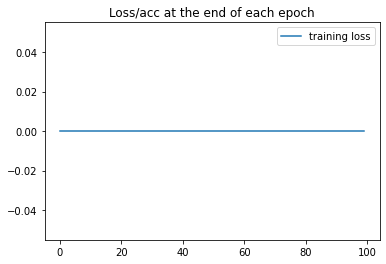

In [19]:
plt.plot(train_losses, label='training loss')
plt.legend()
plt.title('Loss/acc at the end of each epoch')

Text(0.5, 1.0, 'Loss/acc at the end of each epoch')

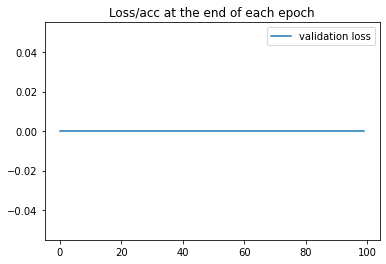

In [20]:
plt.plot(val_losses, label='validation loss')
plt.legend()
plt.title('Loss/acc at the end of each epoch')

Text(0.5, 1.0, 'Loss/acc at the end of each epoch')

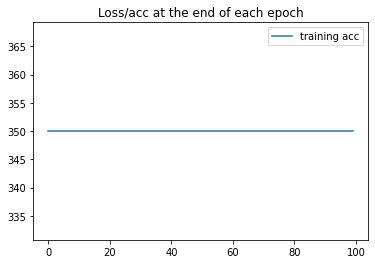

In [21]:
plt.plot(train_accs, label='training acc')
plt.legend()
plt.title('Loss/acc at the end of each epoch')

Text(0.5, 1.0, 'Loss/acc at the end of each epoch')

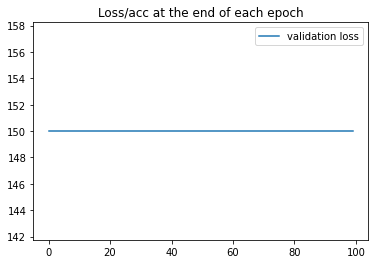

In [22]:
plt.plot(val_accs, label='validation loss')
plt.legend()
plt.title('Loss/acc at the end of each epoch')

### Q1.6 (1)
Find the coefficient of the five features ($x_1, x_2, x_3, x_4, \text{bias}$)

In [23]:
# Your code

## Question 2 (Comprehensive knowledge) (30)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9e/SinusRhythmLabels.svg/1280px-SinusRhythmLabels.svg.png" width=500>

Above is a plot of 1 cycle of Electrocardiography (ECG or EKG) signal.

As you can see the signal shape of the ECG is very distinct from any other signals.

Do you think we can develop an LSTM model to classify ECG signals?

You don't have to answer the question but you have to develop it. Lol.

Let's begin.

### Q2.1 (2)

Our objective is to classify the ECG signals. Therefore, our dataset should consist of ECG signals and a bunch of other signals.

Luckily, there is the `neurokit2` library in `python`. Just `pip3 install neurokit2` and you are ready to use it.

The `neurokit2` provides a sample of ECG, EOG, EEG, RSP, etc, and it provides ECG simulation. This means we can build our dataset by mixing these signals.

Here, your first task is to get to understand the library and its function that we will use.

https://neuropsychology.github.io/NeuroKit/functions/data.html

1. Read the manual and load the 'ecg_1000hz' signal.
2. Verify that the signal contains 50000 samples 
3. Resample (downsampling) the signal into 100 Hz sampling rate using the following command. `scipy.signal.resample(original_signal, target_samples)`
4. Plot the downed sampled signal.

Hint: Take a look at the downloaded signal. There are 50000 samples from a 1000 Hz sampling rate. This means this signal is $50000/1000 = 50$ seconds long. The `resample` will convert the `original_signal` to a new signal with the number of samples equal to `target_sample`. `target_sample` is not a sampling rate. This means the downsampled signal should have 50 seconds x 100 Hz = 5000 samples.



(50000,)
(5000,)


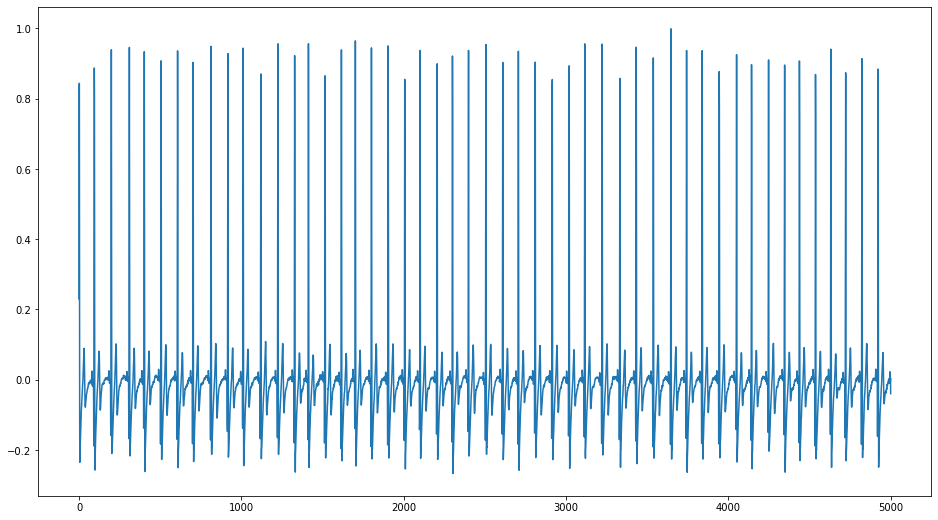

In [24]:
import neurokit2 as nk
import scipy
import matplotlib.pyplot as plt

# Your code

signal = nk.data(dataset= "ecg_1000hz")
print(signal.shape)
signal = scipy.signal.resample(signal, 5000)
print(signal.shape)
plt.figure(figsize=(16,9))
plt.plot(signal)

In [25]:
## This is how the plot should look like
## Pay attention to the x-axis. It is 5,000 samples

### Q2.2 (2)

Our model should learn 1 cycle of ECG. Therefore, we want to extract a cycle of ECG from the signal. Don't get scared off yet. It is actually very simple.

The idea here is to detect the peak of the ECG signal. That peak is called `R-peak`. If you go back to the diagram of the ECG signal, you will see that the highest amplitude is marked `R`. 

There is an algorithm to detect the `R-peak`. We know it would be mean if we give you an equation and ask you to implement the function from scratch. So, use the `neurokit2` library to extract the `R-peak`.

https://neuropsychology.github.io/NeuroKit/functions/ecg.html

There is a function called `ecg_process` which takes `ecg_signal` and `sampling_rate`. The output is many many markers for ECG usage. We are interested in the `ECG_R-Peaks` which returns the array of 0 and 1 where 1 is the index with R-peak.

Once you know the peak, we extract the cycle by offsetting the begin and end to [-0.25, 0.45] second. So, 1 cycle is 0.45 + 0.25 = 0.7 second long

Hint: This is where you have to use your knowledge of numpy. You can use `numpy.where` to get the index from the array of `True, False`. Iterate over the index of peaks and extract the cycle one by one. Lastly, stack the signals into one 2D numpy array.

The shape of the 2D array should be (49, 70). 49 is number of cycles and 70 is each ecg cycle.

In [26]:
signals, info = nk.ecg_process(ecg_signal=signal, sampling_rate=100)
R_peaks = signals["ECG_R_Peaks"]
print(R_peaks.shape)
print(type(R_peaks))
# print(R_peaks)

# Your code
#interval
Q_peaks = signals["ECG_Q_Peaks"]
qpeak1 = np.where(Q_peaks==1)
S_peaks = signals["ECG_S_Peaks"]
speak1 = np.where(S_peaks==1)
q_raw = np.abs(signals['ECG_Raw'][qpeak1[0][0]]*100)
s_raw = np.abs(signals['ECG_Raw'][speak1[0][0]]*100)
#rpeak
rpeak1 = np.where(R_peaks==1)

print(q_raw,s_raw)
sample = np.count_nonzero(rpeak1),[q_raw+s_raw]
print(sample)
_, rpeaks = nk.ecg_peaks(ecg_cleaned=R_peaks, sampling_rate=100)
print(len(rpeaks['ECG_R_Peaks']),[])

(5000,)
<class 'pandas.core.series.Series'>
18.87856565867592 20.808561322146645
(49, [39.68712698082257])
49 []


### Q2.3 (2)

Now we have 49 samples of ECG signals. It might not be enough for the LSTM to learn the shape. Here we will generate the fake ECG signals using the `neurokit2`.

There is a function called `ecg_simulate`. Use this to generate the 1000 Hz of 50 seconds 60 bpm ECG signal. Use method='ecgsyn'.

Once you got the signal, downsample it to 100 Hz.

Plot the signals

(5000,)

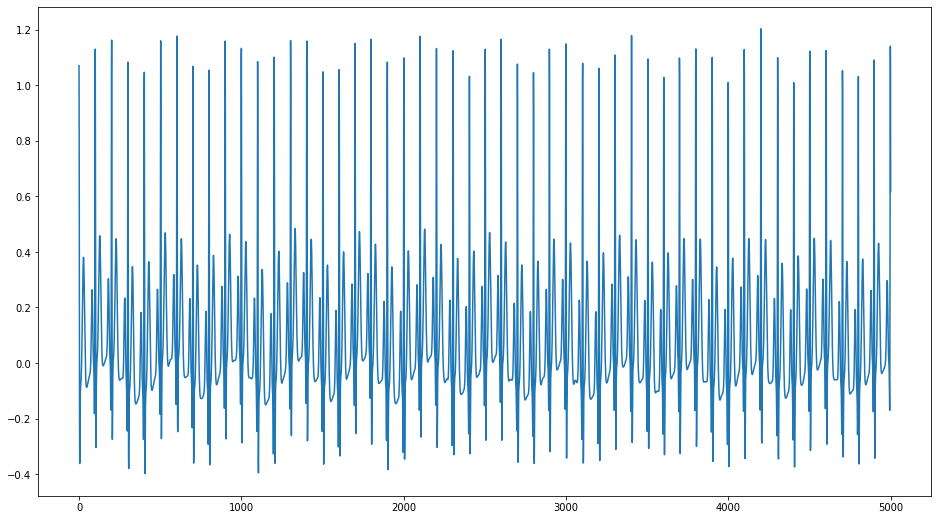

In [28]:
# Your code
ecg = nk.ecg_simulate(duration=50, sampling_rate=100, heart_rate=60, method='ecgsyn')
plt.figure(figsize=(16,9))
plt.plot(ecg)
ecg.shape

In [29]:
## You should get similar to this plot
## It might not match exactly due to the randomization in the function.
## However, the shape of a synthesized ECG pulse is clear different than the real one.

### Q2.4 (1)

Repeat the Q2.2 but this time with the generated ECG signal.

In [30]:
signals, info = nk.ecg_process(ecg_signal=signal, sampling_rate=100)
R_peaks = signals["ECG_R_Peaks"]
print(R_peaks.shape)
print(type(R_peaks))
print(R_peaks)

# Your code

(5000,)
<class 'pandas.core.series.Series'>
0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: ECG_R_Peaks, Length: 5000, dtype: int64


### Q2.5 (1)

Now we get 49 real ECG signals and 49 synthesized ECG signals.

What left is to make non-ECG signals for the model to learn the differences.

We could just randomize the signal but that would be too easy for both you and the LSTM. 

Rather, we will use the `neurokit2` as our advantage to obtain real non-ECG signals.


`eog = nk.data(dataset="eog_100hz").reshape(-1,100)[:,:70]`

`eeg = nk.data(dataset='eeg_150hz').reshape(-1,128)[:,:70]`

I give you the command to both download and segment the signal into 70 samples long. 

But here your task is to plot the `eog` and `eeg` signals (non-segmented ones). 

Take a close look at the amplitude of the signal. 

Do you think LSTM can learn to distinguish the ECG from these two? Why? (2)

In [31]:
# your code
eog = nk.data(dataset="eog_100hz").reshape(-1,100)[:,:70]
# eog = nk.ecg_simulate(duration=10, method="ecgsyn")
eeg = nk.data(dataset='eeg_150hz').reshape(-1,128)[:,:70]
# eeg = nk.ecg_simulate(duration=10, method="ecgsyn")

print(eog.shape,eeg.shape)

(120, 70) (32, 70)


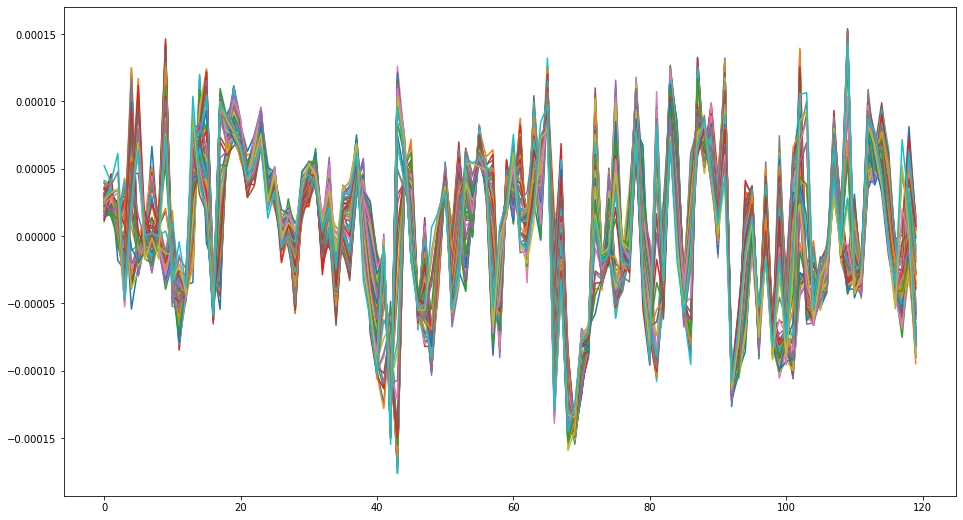

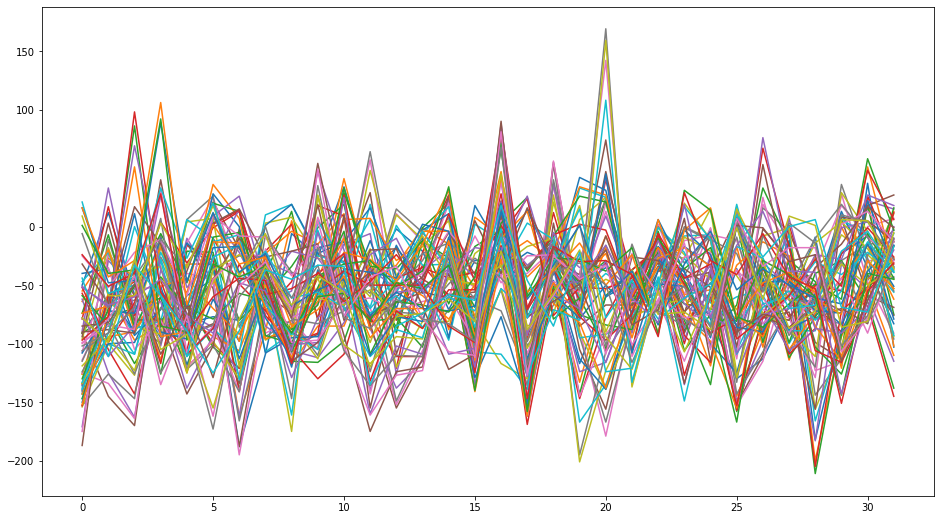

In [32]:
# Again, here is the correct plot.
plt.figure(figsize=(16,9))
plt.plot(eog)
plt.figure(figsize=(16,9))
plt.plot(eeg)

In [33]:
# You should pass this assert.

assert eog.shape == (120, 70) 
assert eeg.shape == (32, 70)

### Q2.6 (5)

Here comes the real difficulty.

Now you should have in your hand
1. (49,70)  real ECG
2. (49,70)  synthesized ECG
3. (120,70) eog
4. (32,70)  eeg

Which means there is 98 ECG and 152 non-ECG.

You can generate 25 seconds of 120 bpm ECG signals, which will results in another 49 ECG signals.

This means you should have roughly an equal size of ECG and non-ECG signals. 

Your tasks is to create the dataset extends/inherits from `torch.utils.data.Dataset`.

**Bonus**: You will get an extra score if your dataset can
1. Change the downsampling target (not just fixed at 100Hz) (3)
2. Easily increase the size of synthesized ECG. (2)

In [34]:
ecganother = nk.ecg_simulate(duration=25, sampling_rate=1000, heart_rate=120)
# Preprocess ECG signal
ecganother, info = nk.ecg_process(ecganother, sampling_rate=1000)
print(ecganother.shape)

(25000, 19)


In [35]:
# Your code
class Signal(Dataset):
    def __init__(self,transform=None):
        self.X = [eog,ecg,ecganother]
        
        self.transform = transform

    def __len__(self):
        return len(self.X)

    # def __getitem__(self, idx):
    #     if torch.is_tensor(idx):
    #         idx = idx.tolist()
    #     self.X = pd.DataFrame(self.X)
    #     self.y = pd.DataFrame(self.y)
    #     preds = self.X.iloc[idx, :]
    #     spc = self.y.iloc[idx]
    #     preds = np.array([preds])
    #     preds = preds.astype('float').reshape(-1, 4)
    #     spc = np.array([spc])
    #     spc = spc.astype('float').reshape(-1, 1)
    #     sample = {'preds': preds, 'spc': spc}

    #     if self.transform:
    #         sample = self.transform(sample)
            
    #     return sample

In [36]:
dataset = Signal()
dataset.X.shape,dataset.y.shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
# You should pass this assert

assert dataset.X.shape == (299, 70)
assert dataset.y.shape == (299, 1)

### Q2.7 (4)

Implement the LSTM with 70 as input layers, hidden size of 30, and output as 1.

Define the appropriate `criterion` and `optimizer`

In [37]:
input_size = 70 #same as input features
hidden_size = 30 #same as output features
lstm = nn.LSTM(input_size,hidden_size,num_layers= 2)

In [38]:
# Your code
class LSTM(nn.Module):
    #why out_size = 1, because later on, we will label_size = 1
    def __init__(self,hidden_size, out_size = 1):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size,hidden_size)
        self.linear = nn.Linear(hidden_size,out_size) #taking the last hidden state

        #optional 
        #h0, c0
        #(D*num layer, N, Hin)
        self.hidden = (torch.zeros(1, 1, hidden_size),
                       torch.zeros(1, 1, hidden_size))

    def forward(self, seq):
        #seq shape : 40 <-- already after input data
        seq = seq.reshape(len(seq),1,-1)
        #seq shape: (40, 1, 1)
        out, (_,_) = self.lstm(seq, self.hidden) #you don't need self.hidden
        #out shape : (L, N, Hout * D) ==> (40, 1, 50)
        #get the last hidden state
        out = out[-1,:,:] #(B, Hout)
        #out shape : (1,50) 
        out = self.linear(out)
        #out shape : (1, 1)
        return out

In [39]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

### Q2.8 (2)

Train your LSTM with 100 epochs.

Plot the training loss of every epoch.

In [ ]:
# Your code
epochs = 100
future = 40

for i in range(epochs):
    
    for seq, y_train in train_data:
        #seq shape : (40)
        #y_train : (1)
        # print(seq.shape)
        # print(y_train.shape)
        # break
        yhat = model(seq) #1. predict
        yhat = yhat.reshape(-1) #I think you don't need this
        # print(yhat.shape, y_train.shape)
        loss = criterion(yhat,y_train) #2. loss
        optimizer.zero_grad() #3. zero_grad
        loss.backward() #4. backward
        optimizer.step() #5. step
    
    print(f'Epoch : {i} - Loss : {loss}')
    
    
    #do the test right away here - like validation
    preds = train_set[-window_size:].tolist() #take the last 40 guys since 720-760
    # print(preds)

    for _ in range(future): #0 to 39
        seq = torch.FloatTensor(preds[-window_size:]) #empty array of size 40 #720-760
        with torch.no_grad():
            yhat = model(seq)
            preds.append(yhat) #761
    
    loss = criterion(torch.tensor(preds[-window_size:]), y[760:])
    print(f'Loss: {loss}')

    # Plot from point 700 to the end
    plt.figure(figsize=(12,4))
    plt.xlim(700,801)
    plt.grid(True)
    plt.plot(y.numpy())
    plt.plot(range(760,800),preds[window_size:])
    plt.show()

### Q2.9 (2)

Test the model with 
1. synthesized ECG with duration 60, sampling rate 1000, bpm [50,80,110,150]
2. white noise. **hint: use np.random.rand()**

Is your model achive high accuracy? Why? (2)

In [ ]:
# Your code